## Создание базовых генеративно-созтязательных сетей (GAN)

> Неделя 1 (Введение в GAN)

<hr>

### Разновидности моделей в машинном обучении

> - Дискриминативные модели - используются для классификации (например, различие между кошками и собаками)
> - **Генеративные модели** - пытаются узнать как сделать реалистичное представление некоторого класса (например, представление собаки)

<h4 align="center">
    <img width="600px" src="./img/discriminative_and_generative_models.png" alt="Дискриминативные и генеративные модели" />
</h4>

### Типы генеративных моделей

- Вариационные автоэнкодеры (VAE)

<h4 align="center">
    <img width="600px" src="./img/vae_schema.jpg" alt="VAE" />
</h4>

- **Генеративно-состязательные сети (GAN)**

<h4 align="center">
    <img width="600px" src="./img/gan_schema.png" alt="GAN" />
</h4>

<h4 align="center">
    <img width="600px" src="./img/gan_schema_in_detail.png" alt="Detail GAN" />
</h4>

<h4 align="center">
    <img width="300px" src="./img/gan_schema_in_detail_2.png" alt="Detail GAN" />
</h4>

### Эволюция GAN

> GAN существуют с 2014 года (см. [Generative Adversarial Networks](https://arxiv.org/abs/1406.2661)), однако уже достигли впечатляющей производительности при выполнении множества задач (см. [StyleGAN2](https://www.thispersondoesnotexist.com/)).

<h4 align="center">
    <img width="600px" src="./img/evolution_gan.jpg" alt="Эволюция GAN" />
</h4>

> GAN могут учиться на любых данных, которые им предоставлены.

### Логика GAN

> GAN - это мощные модели способные учиться создавать реалистичные объекты, которые будут трудно отличить от существующих реальных (например, человеческие лица). GAN состоят из генератора и дискриминатора, которые конкурируют между собой.
>
> - Генератор (подделыватель картин) учится генерировать фейки, которые выглядят настоящими, чтобы обмануть дискриминатор

<h4 align="center">
    <img width="600px" src="./img/generator.jpg" alt="Генератор" />
</h4>

> - Дискриминатор (арт-инспектор) учится различать что настоящее, а что подделка
> 
> **Особенности обучения:**
> - В процессе обучения генератору не разрешено видеть оригинальных изображений. Он даже не знает, что представляют из себя эти изображения
> - Дискриминатору разрешено смотреть на оригинальные изображения в процессе обучения. Однако на вход ему подаются перемешанные фейковые и оригинальные изображения и он не знает, какие из них настоящие. Это дискриминатору предстоит выяснить в процессе обучения.
>
> **Проблема при обучении:**
> - Слишком быстрый процесс обучения дискриминатора. Когда дискриминатор обучается быстро, он смотрит на поддельное изображение и говорит: это 100% подделка. Однако эти 100% бесполезны для генератора, потому что он не знает в каком направлении улучшаться. Таким образом, вывод дискриминатора будет более информативным, например, если он определит, что изображение фальшивое на 87% или 20%, в отличие от 100%.

### Введение в PyTorch

> **PyTorch** наравне с **TensorFlow** самые популярные фреймворки для глубокого машинного обучения
>
> Основное различие между ними **PyTorch** и **TensorFlow** заключается в способе, которым они обычно производят вычисления, в **PyTorch** все вычисления производятся последовательно (императивное программирование). В **TensorFlow** сперва опрелеляются функции, а потом производятся вычисления (символический подход).

<h4 align="center">
    <img width="600px" src="./img/PyTorch_TensorFlow.png" alt="PyTorch и TensorFlow" />
</h4>

### Установка PyTorch

> CMD
>
> ```shell script
> pip install torch torchvision
> ```

### Импорт необходимых инструментов

In [148]:
import torch # Машинное обучение (Facebook)
from torch import nn # Настраиваемые слои для моделей глубокого обучения

import pandas as pd # Обработка и анализ данных
import numpy as np # Научные вычисления

### Версии необходимых библиотек

In [4]:
pkgs = {
    'Package': ['PyTorch', 'NumPy', 'Pandas'],
    'Version': [i.__version__ for i in [torch, np, pd]]}

df_pkgs = pd.DataFrame(data = pkgs) # Версии используемых библиотек
df_pkgs.head(None).style.hide_index() # Отображение первых N строк или все если указать None

Package,Version
PyTorch,1.6.0
NumPy,1.19.2
Pandas,1.1.2


### Определение модели PyTorch (Линейная регрессия)

In [141]:
# Линейная регрессия
class LinearRegression(nn.Module):
    # Конструктор
    def __init__(self, n):
        '''
        n - количество входных данных
        '''
        super().__init__()
        
        # Определение архитектуры логистической регрессии
        self.linear_reg = nn.Linear(n, 1)
    
    def forward(self, x):
        '''
        x - количество входных данных
        '''
        return self.linear_reg(x) # Логистическая регрессия

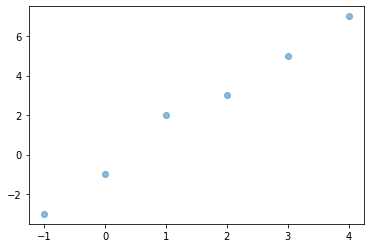

In [142]:
# Набор данных
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype = float).astype(np.float32) # X
ys = np.array([-3.0, -1.0, 2.0, 3.0, 5.0, 7.0], dtype = float).astype(np.float32) # Y

# Транспонирование
xs = xs.reshape(-1, 1)
ys = ys.reshape(-1, 1)

plt.scatter(xs, ys, alpha = 0.5)
plt.show()

Эпоха: 50, Loss: 0.44861093163490295
Эпоха: 100, Loss: 0.24706487357616425
Эпоха: 150, Loss: 0.17567378282546997
Эпоха: 200, Loss: 0.15038278698921204
Эпоха: 250, Loss: 0.14142325520515442
Эпоха: 300, Loss: 0.1382492184638977
Эпоха: 350, Loss: 0.13712482154369354
Эпоха: 400, Loss: 0.1367264688014984
Эпоха: 450, Loss: 0.13658533990383148
Эпоха: 500, Loss: 0.13653536140918732


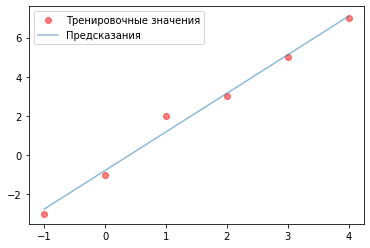

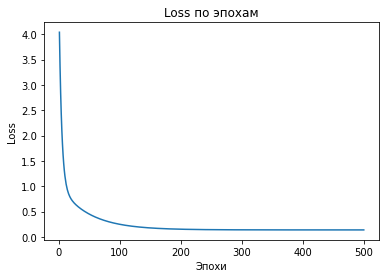

18.90852928161621

In [151]:
model = LinearRegression(xs.shape[1]) # Инициализация модели
model.parameters()

criterion = nn.MSELoss() # Функция стоимости модели
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) # Оптимизатор

n_epoch = 500 # Количество эпох
loss_in_each_epoch = [] # Loss

# Обучение модели
for epoch in range(n_epoch):
    epoch += 1
    
    # Преобразование numpy в torch
    xst = torch.from_numpy(xs)
    yst = torch.from_numpy(ys)
    
    optimizer.zero_grad() # Очистка градиентов от всех оптимизированных тензоров
    y_pred = model(xst) # Предсказания модели
    loss = criterion(y_pred, yst) # Функция потерь
    loss.backward()
    optimizer.step()
    
    # Loss
    loss_in_each_epoch.append(loss.item())
    
    if (epoch) % 50 == 0:
        print('Эпоха: {}, Loss: {}'.format(epoch, loss.item()))

# Получение предсказаний
predicted = model.forward(torch.from_numpy(xs)).cpu().data.numpy()

plt.plot(xs, ys, 'ro', label = 'Тренировочные значения', alpha = 0.5)
plt.plot(xs, predicted, label = 'Предсказания', alpha = 0.5)
plt.legend()
plt.show()

# Всего эпох
epoch = [i for i in range(1, n_epoch + 1)]

plt.plot(epoch, loss_in_each_epoch)
plt.title('Loss по эпохам')
plt.xlabel('Эпохи')
plt.ylabel('Loss')
plt.show()

# Тестовое значение
x_test = torch.Tensor([[10.0]])

predicted = model.forward((x_test))

predicted.item()

### Статья

> [Состояние фреймворков машинного обучения в 2019 году](https://thegradient.pub/state-of-ml-frameworks-2019-pytorch-dominates-research-tensorflow-dominates-industry/)

### Введение в PyTorch

#### Формирование тензора

In [153]:
tensor = torch.Tensor([
    [[1, 2], [3, 4]], 
    [[5, 6], [7, 8]], 
    [[9, 0], [1, 2]]
])

tensor

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]],

        [[9., 0.],
         [1., 2.]]])

#### Просмотр устройства

In [154]:
tensor.device

device(type='cpu')

#### Выполнение на другом устройстве (**cpu** или **cuda**)

In [157]:
new_tensor = tensor.to('cpu') # Или cuda

#### Просмотр измерения тензора

In [158]:
tensor.shape

torch.Size([3, 2, 2])

In [160]:
print('Ранг =', len(tensor.shape))
print('Всего элементов в тензоре =', tensor.numel())

Ранг = 3
Всего элементов в тензоре = 12


#### Индексация тензора

In [161]:
tensor[1] # Строка под индексом 1

tensor([[5., 6.],
        [7., 8.]])

In [163]:
tensor[1, 1, 0]

tensor(7.)

In [164]:
tensor[1, 1, 0].item() # Значение из тензора в формате Python

7.0

In [169]:
tensor[:, 1, 1] # Столбец

tensor([4., 8., 2.])

#### Генерация тензора

In [172]:
torch.ones_like(tensor) # Тензор заполненный единицами

tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])

In [173]:
torch.zeros_like(tensor) # Тензор заполненный нулями

tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])

In [177]:
torch.randn_like(tensor) # Тензор с нормальным Гауссовским распределением

tensor([[[ 0.4212,  1.3086],
         [ 1.5056, -1.2092]],

        [[ 0.6977, -0.3684],
         [ 0.7741, -0.1284]],

        [[-1.9139, -2.0773],
         [-0.0997,  1.7577]]])

In [178]:
torch.randn(2, 2, device = 'cpu') # Тензор с нормальным Гауссовским распределением

tensor([[ 0.9143, -1.8423],
        [ 2.1746, -0.7340]])

### Введение в GAN

#### Дискриминатор против генератора

> Два основных компонента GAN это **генератор** и **дискриминатор**

##### Дискриминатор (классификатор)

> Одним из наиболее используемых типов моделей машинного обучения является классификатор, который используется для сортировки элементов в наборе данных и классификации их по различным категориям. Например, классификатор изображений, который может различать изображения кошек или собак.

<h4 align="center">
    <img width="600px" src="./img/classificator.gif" alt="Дискриминатор" />
</h4>

> С точки зрения теории вероятности классификатор хочет вычислить $p(y|x)$, тоесть вероятность того, что при вводе $x$, необходимо узнать вероятность его класса $y$, которая является котом $p(y=\text{кошка}|x)$ или собакой $p(y=\text{собака}|x)$.
>
> Дискриминатор - это просто классификатор с двумя классами: настоящий и поддельный. Учитывая входное $x$ дискриминатор вычислит вероятности $p(настоящий|x)$ и $p(подделка|x)$ и в конечном итоге классифицирует $x$. Входной $x$ не ограничивается изображениями и может быть всем чем угодно. GAN можно обучить работе с видео, текстом, аудио и т.д.

##### Генератор

> С точки зрения теории вероятности генератор хочет вычислить $p(x|y)$, тоесть вероятность того, на сколько созданный им $(y=\text{объект})$ похож на оригинальный $x$.
>
> На примере видно, как генератор пытается найти особенности, которые представляют всех кошек, используя обратную связь от дискриминатора.

<h4 align="center">
    <img width="600px" src="./img/gan2.png" alt="Генератор" />
</h4>

### StyleGAN

In [206]:
# Клонирование StyleGAN
!git clone https://github.com/DmitryRyumin/stylegan.git

fatal: целевой путь «stylegan» уже существует и не является пустым каталогом.


In [3]:
# Установка версии tensorflow для StyleGAN
!pip install tensorflow==1.15.4

     |████████████████████████████████| 123.3 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 503 kB 3.2 MB/s eta 0:00:01
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7540 sha256=6a225b19c368a25176291d767f8c9bc648c710d4e7d013d9c3b83ac1dced02f2
  Stored in directory: /Users/dl/Library/Caches/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: gast
    Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling t

In [1]:
import sys
sys.path.append(r'stylegan')

import tensorflow as tf # Машинное обучение
import logging # Система регистрации событий для библиотек
# Уровень регистрации событий, только ошибки
tf.get_logger().setLevel(logging.ERROR)

import os # Взаимодействие с файловой системой
import pickle # Сериализация объектов Python
import numpy as np # Научные вычисления
import PIL.Image # Работа с изображениями
import stylegan # StyleGAN - официальная реализация TensorFlow
from stylegan import dnnlib
from stylegan import config # Файл конфигурации
from stylegan.dnnlib import tflib
from tensorflow.python.util import module_wrapper
module_wrapper._PER_MODULE_WARNING_LIMIT = 0

# Инициализация TensorFlow
tflib.init_tf()

# Загрузка модели
url = 'https://files.sberdisk.ru/s/MTgP2retx6Wzxe4/download'

with stylegan.dnnlib.util.open_url(url, cache_dir = config.cache_dir) as f:
    _G, _D, Gs = pickle.load(f)
#     Gs.print_layers()

In [2]:
# Set the random seed that generates the noise vectors
rnd = np.random.RandomState(42)

# Set the number of images to generate
batch_size = 4

# Set the truncation value for truncation trick sampling
truncation = 0.7

# Create a noise vector z for each sample in the batch: (batch_size, z_dim)
z_dim = Gs.input_shape[1] # StyleGAN authors use the image dim (512) as the size of z
print(f'Noise vector has size {z_dim}')
noise_vectors = rnd.randn(batch_size, z_dim)

# Generate image by running (sampling) the generator
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True) # Specify the desired output format and shape
images = Gs.run(noise_vectors,
                None,    # No labels/conditions because it is unconditional generation (more on this in the coming lectures)
                truncation_psi=truncation, 
                randomize_noise=False,
                output_transform=fmt
                )

# Display images
if batch_size > 1:
    img = np.concatenate(images, axis=1) # Save all images in batch to a single image
else:
    img = images[0]
PIL.Image.fromarray(img, 'RGB')

Noise vector has size 512


InvalidArgumentError: Cannot assign a device for operation Gs/_Run/Gs/latents_in: node Gs/_Run/Gs/latents_in (defined at /Users/dl/Desktop/Programming/Python/env/Coursera/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1748)  was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0, /job:localhost/replica:0/task:0/device:XLA_CPU:0 ]. Make sure the device specification refers to a valid device. The requested device appears to be a GPU, but CUDA is not enabled.
	 [[Gs/_Run/Gs/latents_in]]